# Multi- class Classification with MNIST Dataset of Handwritten Digits.

In [1]:
# Import relevant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## **Using Deep Neural Network(DNN)**

In [3]:
# Load Dataset
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


### View Dataset

In [6]:
# Output example #2917 of the training set.
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 110, 250, 254, 254, 254, 254, 254, 254, 254, 254, 184,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 216, 254, 254, 254, 254, 254, 254, 254, 254, 254, 251,  54,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3, 131, 197,  68, 137, 101,  83,  41,  70, 221, 254, 108,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 110, 254, 254,  24,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  83, 247, 254, 192,  10,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  37, 124, 254, 254, 250,  47,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 113, 178, 250, 254, 254, 254, 252, 178, 128,  50,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  69, 252, 254, 254, 254, 254, 254, 254, 254, 254, 153,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 141, 252, 254, 241, 241, 254, 247, 252, 254, 254, 153,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  68,  82,   5,   5,  82,  37,  65, 167, 254, 190,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 162, 254, 153,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 172, 253,  75,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 102, 254, 152,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 230, 216,  20,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  71, 222, 254, 142,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  66, 254, 254, 157,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,  34,  34,  78, 161, 226, 249, 254, 154,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  96, 184, 254, 254, 254, 254, 254, 249,  93,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [7]:
x_train.shape

(60000, 28, 28)

In [14]:
print(y_train[5000])

7


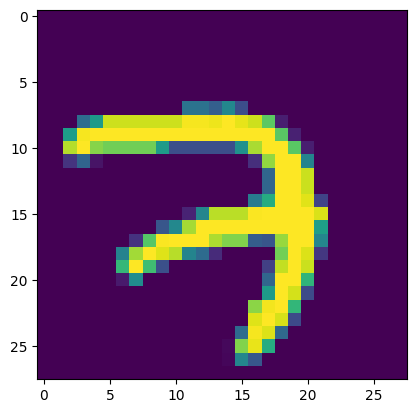

In [13]:
plt.imshow(x_train[5000])

In [12]:
# Output row #10 of example #2000.
x_train[5000][10]

array([  0,   0, 226, 254, 208, 199, 199, 199, 199, 139,  61,  61,  61,  61,  61, 128, 222, 254, 254, 189,  21,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [11]:
# Output pixel #16 of row #10 of example #5000.
x_train[5000][10][16]

222

**Indicates almost Balanced data**

In [15]:
unique_labels, counts = np.unique(y_train, return_counts=True)

# Print unique labels and their counts
for label, count in zip(unique_labels, counts):
    print(f"Class {label}: {count} samples")


Class 0: 5923 samples
Class 1: 6742 samples
Class 2: 5958 samples
Class 3: 6131 samples
Class 4: 5842 samples
Class 5: 5421 samples
Class 6: 5918 samples
Class 7: 6265 samples
Class 8: 5851 samples
Class 9: 5949 samples


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Define your model
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255., input_shape=(28, 28, 1)))
model.add(Flatten(input_shape=(28, 28, 1)))  # Example input shape for MNIST dataset
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 23514

Epoch 1/100
12/12 [==============================] - 2s 119ms/step - loss: 1.0590 - accuracy: 0.6911 - val_loss: 0.3465 - val_accuracy: 0.8985
Epoch 2/100
12/12 [==============================] - 1s 101ms/step - loss: 0.3564 - accuracy: 0.8946 - val_loss: 0.2374 - val_accuracy: 0.9314
Epoch 3/100
12/12 [==============================] - 1s 108ms/step - loss: 0.2457 - accuracy: 0.9284 - val_loss: 0.1863 - val_accuracy: 0.9457
Epoch 4/100
12/12 [==============================] - 1s 103ms/step - loss: 0.1899 - accuracy: 0.9437 - val_loss: 0.1535 - val_accuracy: 0.9558
Epoch 5/100
12/12 [==============================] - 1s 104ms/step - loss: 0.1551 - accuracy: 0.9544 - val_loss: 0.1347 - val_accuracy: 0.9599
Epoch 6/100
12/12 [==============================] - 3s 220ms/step - loss: 0.1305 - accuracy: 0.9612 - val_loss: 0.1218 - val_accuracy: 0.9631
Epoch 7/100
12/12 [==============================] - 2s 194ms/step - loss: 0.1124 - accuracy: 0.9662 - val_loss: 0.1169 - val_accuracy: 0.9659

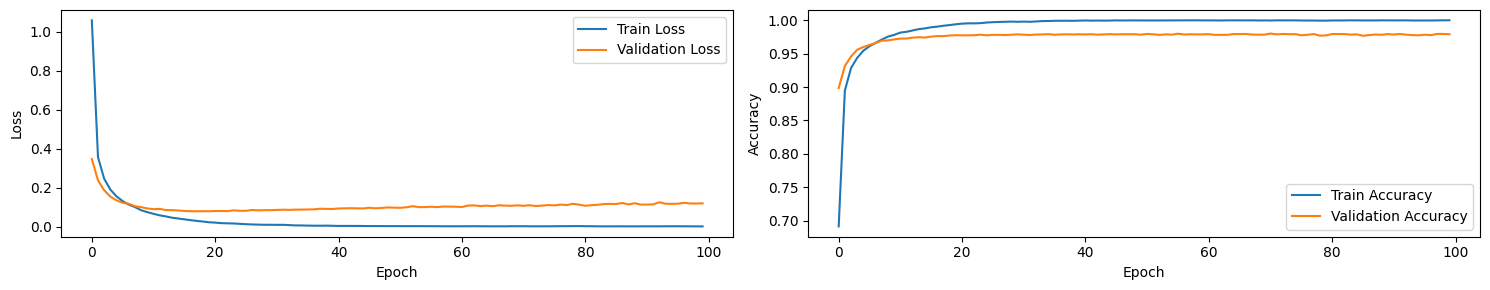

In [18]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 100
batch_size = 4000
validation_split = 0.2

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])

# Train the model.
history = model.fit(x=x_train, y=y_train, batch_size=batch_size,
                    epochs=epochs, shuffle=True,
                    validation_split=validation_split)

# To track the progression of training, gather a snapshot
# of the model's metrics at each epoch.
epochs = history.epoch
# hist = pd.DataFrame(history.history)

# Plot a graph of the metric vs. epochs.

plt.figure(figsize=(15, 3))

# Train Loss vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history[model.metrics_names[0]], label='Train Loss')
plt.plot(history.history[f'val_{model.metrics_names[0]}'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Train Accuracy vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history[model.metrics_names[1]], label='Train Accuracy')
plt.plot(history.history[f'val_{model.metrics_names[1]}'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Somewhat overfitting with 100 epochs

In [23]:
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/MLMarch/100_model.h5')

# model.save('100_model.h5') # For saving it locally

Mounted at /content/drive


In [28]:
# from tensorflow.keras.models import load_model
# from google.colab import drive
# drive.mount('/content/drive')
# model = load_model('/content/drive/MyDrive/MLMarch/100_model.h5')

# Evaluate against the test set.

print("\n Evaluate the new model against the test set:")
model.evaluate(x=x_test, y=y_test, batch_size=batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Evaluate the new model against the test set:
3/3 [==============================] - 0s 6ms/step - loss: 0.1070 - accuracy: 0.9797


[0.10700371116399765, 0.9797000288963318]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

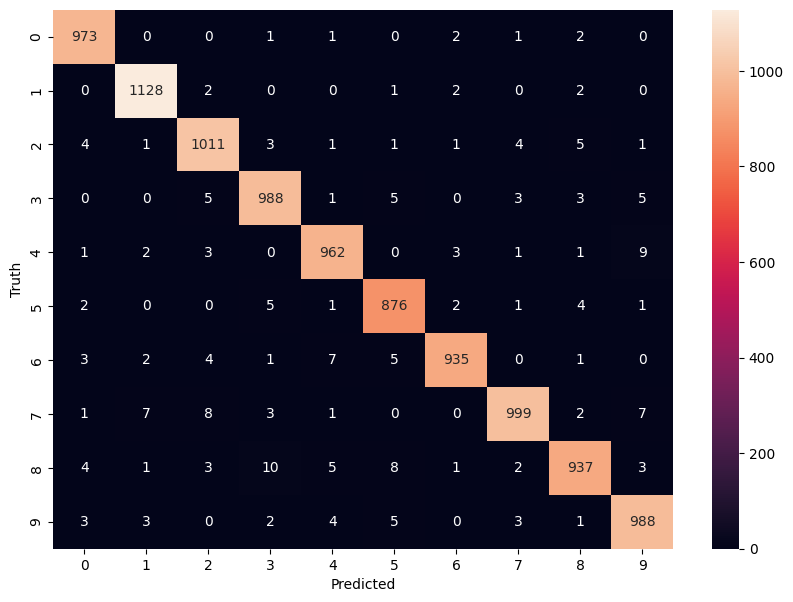

In [20]:
import seaborn as sn
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
y_predicted

array([[2.3779655e-11, 4.9085274e-09, 3.7788103e-10, ..., 9.9999994e-01, 2.2014523e-12, 4.5727269e-10],
       [4.0631430e-18, 1.6763364e-12, 9.9999994e-01, ..., 2.1872372e-21, 3.8732015e-20, 5.9075538e-26],
       [2.2156001e-10, 9.9999994e-01, 6.4413014e-10, ..., 1.9172968e-09, 1.5348697e-08, 5.8842501e-12],
       ...,
       [2.5596686e-20, 3.5313913e-15, 3.0741720e-22, ..., 7.0845253e-14, 8.2694040e-18, 2.0392783e-13],
       [1.5772588e-15, 3.4802479e-17, 5.2663653e-19, ..., 1.5340644e-16, 3.8038000e-11, 6.1281167e-18],
       [9.9389215e-16, 1.2345499e-19, 1.1429231e-18, ..., 5.0552514e-27, 4.1235719e-18, 9.6526420e-21]], dtype=float32)

In [22]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_predicted_labels)

print("__Classification Report__ [For Normal Deep Neural Net without any augmentation]:")
print(report)

__Classification Report__ [For Normal Deep Neural Net without any augmentation]:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## **Using Data Augmentation with DNN**

In [2]:
# Importing again otherwise Normalization will happen twice
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = np.expand_dims(x_train, axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [4]:
# Train and validation split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [8]:
from keras.preprocessing.image import ImageDataGenerator
batch_size  = 4000
# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest')

# Fit the ImageDataGenerator to your dataset
datagen.fit(x_train)
datagen.fit(x_val)
# Generate augmented data
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = datagen.flow(x_val, y_val, batch_size=batch_size)

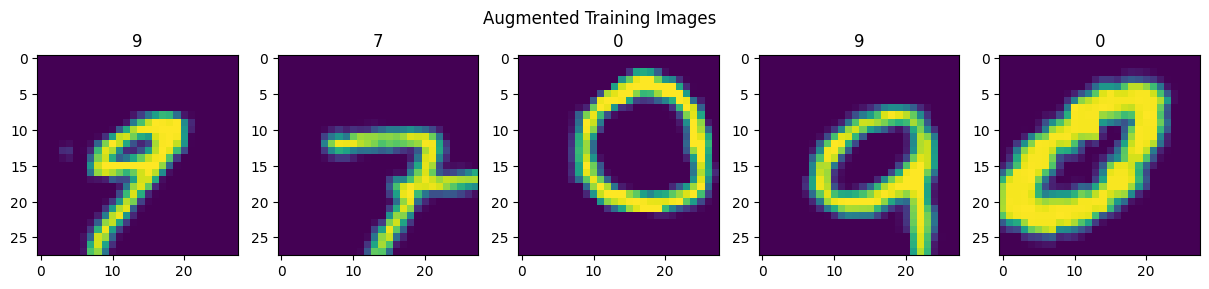

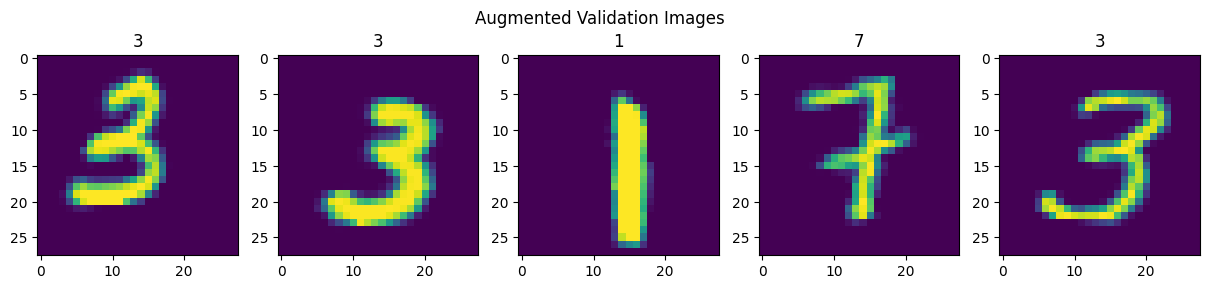

In [9]:
# Plot some augmented images

import numpy as np
import matplotlib.pyplot as plt

def plot_aug_images(generator, title):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
    fig.suptitle(title)

    for i in range(5):
        # Get a batch of images and labels from the generator
        batch = next(generator)
        images = batch[0]
        labels_batch = batch[1]

        # Pick one image from the batch
        image = images[i]

        # Rescale the image to the original range [0, 255]
        # image = (image * 255).astype('uint8')

        label = labels_batch[i]

        # Plot raw pixel data
        ax[i].imshow(image)
        #ax[i].axis('off')
        ax[i].set_title(label)

    plt.show()

# Plot 5 augmented train images
plot_aug_images(train_generator, "Augmented Training Images")
plot_aug_images(train_generator, "Augmented Validation Images")

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

# Define your model [Using SAME model architecture as above]
model_aug = Sequential()
model_aug.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255., input_shape=(28, 28, 1)))
model_aug.add(Flatten(input_shape=(28, 28, 1)))  # Example input shape for MNIST dataset
model_aug.add(Dense(256, activation='relu'))
model_aug.add(Dense(128, activation='relu'))
model_aug.add(tf.keras.layers.Dropout(rate=0.2))
model_aug.add(Dense(10, activation='softmax'))  # Output layer with 10 classes

model_aug.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 23514

Epoch 1/100
12/12 [==============================] - 19s 1s/step - loss: 1.8807 - accuracy: 0.3821 - val_loss: 1.3992 - val_accuracy: 0.5741
Epoch 2/100
12/12 [==============================] - 14s 1s/step - loss: 1.2852 - accuracy: 0.5873 - val_loss: 1.0403 - val_accuracy: 0.6856
Epoch 3/100
12/12 [==============================] - 39s 3s/step - loss: 1.0034 - accuracy: 0.6897 - val_loss: 0.8292 - val_accuracy: 0.7572
Epoch 4/100
12/12 [==============================] - 15s 1s/step - loss: 0.8075 - accuracy: 0.7595 - val_loss: 0.6620 - val_accuracy: 0.8150
Epoch 5/100
12/12 [==============================] - 16s 1s/step - loss: 0.6606 - accuracy: 0.8035 - val_loss: 0.5389 - val_accuracy: 0.8467
Epoch 6/100
12/12 [==============================] - 25s 2s/step - loss: 0.5489 - accuracy: 0.8403 - val_loss: 0.4457 - val_accuracy: 0.8783
Epoch 7/100
12/12 [==============================] - 18s 1s/step - loss: 0.4732 - accuracy: 0.8618 - val_loss: 0.3848 - val_accuracy: 0.8920
Epoch 8/100
1

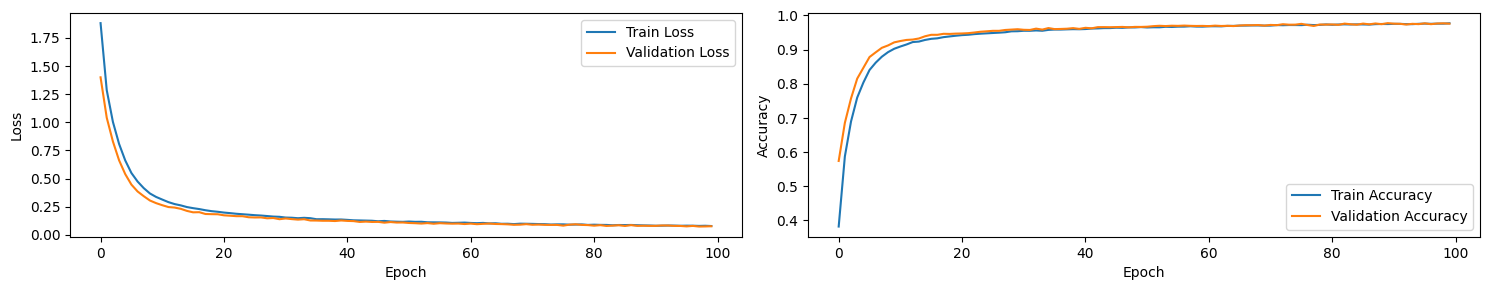

In [11]:
# Compile the model
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
'''sparse_categorical_crossentropy is for integer targets;
    categorical_crossentropy is for one hot encoded targets'''

learning_rate = 0.003
epochs = 100
batch_size = 4000

# Train model
history = model_aug.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=val_generator,
)

# Plot metrics during training
plt.figure(figsize=(15, 3))

# Train Loss vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history[model_aug.metrics_names[0]], label='Train Loss')
plt.plot(history.history[f'val_{model_aug.metrics_names[0]}'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Train Accuracy vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history[model_aug.metrics_names[1]], label='Train Accuracy')
plt.plot(history.history[f'val_{model_aug.metrics_names[1]}'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Issue of overfitting is resolved to some extent

Trained with T4 GPU, Colab



In [13]:
from google.colab import drive
drive.mount('/content/drive')
model_aug.save('/content/drive/MyDrive/MLMarch/Augmented_100_model.h5')

# model_aug.save('Augmented_100_model.h5') # For saving it locally

Mounted at /content/drive


In [29]:
# from tensorflow.keras.models import load_model
# from google.colab import drive
# drive.mount('/content/drive')
# model_aug = load_model('/content/drive/MyDrive/MLMarch/Augmented_100_model.h5')

print("\n Evaluate the model against the test set:")
model_aug.evaluate(x=x_test, y=y_test, batch_size=batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Evaluate the model against the test set:
3/3 [==============================] - 0s 6ms/step - loss: 0.0365 - accuracy: 0.9872


[0.036526937037706375, 0.9872000217437744]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

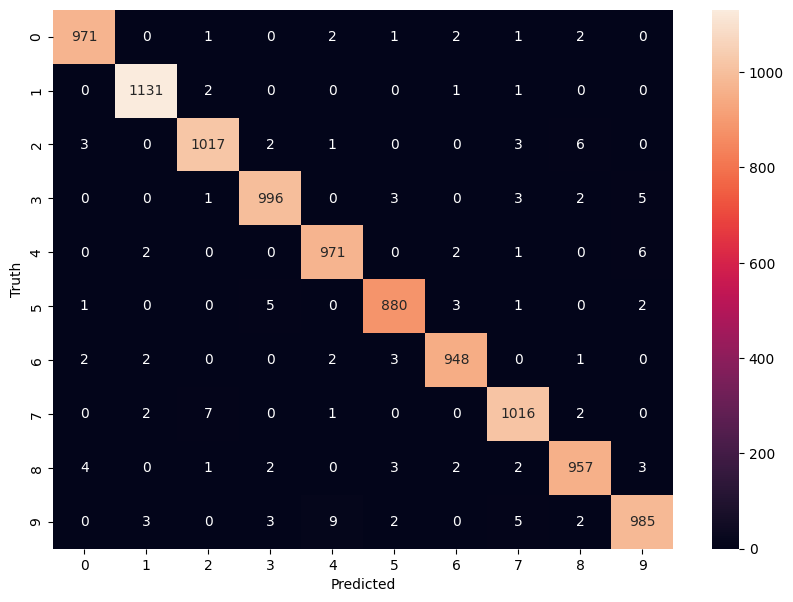

In [14]:
import seaborn as sn
y_predicted = model_aug.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_predicted_labels)

print("__Classification Report__ [Using Augmented data]:")
print(report)

__Classification Report__ [Using Augmented data]:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## **Using Data Augmentation + CNN**

In [16]:
# Importing again other Normalization will happen twicw
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [17]:
x_train = np.expand_dims(x_train, axis=-1)
x_train.shape

(60000, 28, 28, 1)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [19]:
from keras.preprocessing.image import ImageDataGenerator
batch_size  = 4000
# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest')

# Fit the ImageDataGenerator to your dataset
datagen.fit(x_train)
datagen.fit(x_val)
# Generate augmented data
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
val_generator = datagen.flow(x_val, y_val, batch_size=batch_size)

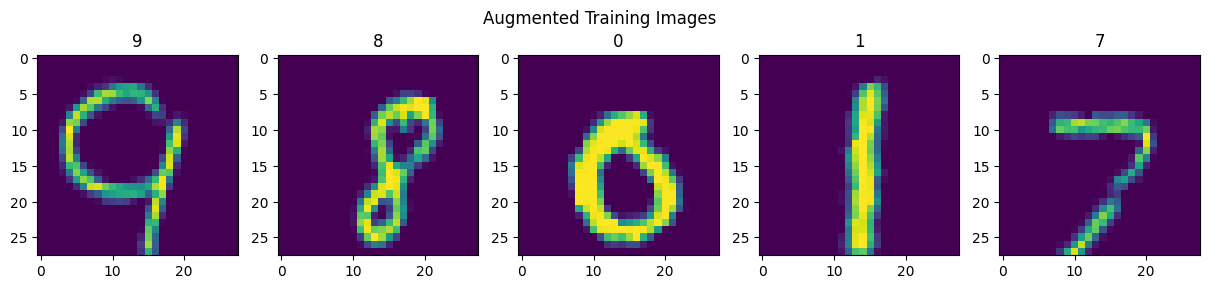

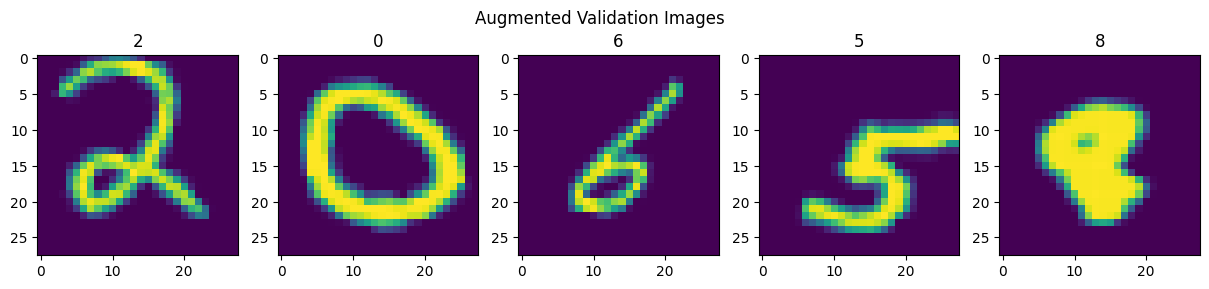

In [20]:
# Plot some augmented images

import numpy as np
import matplotlib.pyplot as plt

def plot_aug_images(generator, title):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
    fig.suptitle(title)

    for i in range(5):
        # Get a batch of images and labels from the generator
        batch = next(generator)
        images = batch[0]
        labels_batch = batch[1]

        # Pick one image from the batch
        image = images[i]
        label = labels_batch[i]

        # Plot raw pixel data
        ax[i].imshow(image)
        #ax[i].axis('off')
        ax[i].set_title(label)

    plt.show()

# Plot 5 augmented train images
plot_aug_images(train_generator, "Augmented Training Images")
plot_aug_images(train_generator, "Augmented Validation Images")

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_conv = Sequential()
model_conv.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255., input_shape=(28, 28, 1)))
model_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))

model_conv.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_conv.add(Dropout(0.2))
# Flatten layer to transition from convolutional layers to dense layers
model_conv.add(Flatten())

# Add dense layers
model_conv.add(Dense(128, activation='relu'))
model_conv.add(Dropout(0.2))
model_conv.add(Dense(10, activation='softmax'))  # Output layer with 10 classes
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

Epoch 1/100
12/12 [==============================] - 16s 1s/step - loss: 0.4713 - accuracy: 0.8526 - val_loss: 0.3681 - val_accuracy: 0.8899
Epoch 2/100
12/12 [==============================] - 15s 1s/step - loss: 0.3976 - accuracy: 0.8802 - val_loss: 0.3107 - val_accuracy: 0.9047
Epoch 3/100
12/12 [==============================] - 18s 2s/step - loss: 0.3449 - accuracy: 0.8941 - val_loss: 0.2667 - val_accuracy: 0.9204
Epoch 4/100
12/12 [==============================] - 15s 1s/step - loss: 0.3089 - accuracy: 0.9048 - val_loss: 0.2413 - val_accuracy: 0.9262
Epoch 5/100
12/12 [==============================] - 15s 1s/step - loss: 0.2785 - accuracy: 0.9149 - val_loss: 0.2108 - val_accuracy: 0.9387
Epoch 6/100
12/12 [==============================] - 17s 1s/step - loss: 0.2614 - accuracy: 0.9200 - val_loss: 0.2010 - val_accuracy: 0.9384
Epoch 7/100
12/12 [==============================] - 15s 1s/step - loss: 0.2427 - accuracy: 0.9261 - val_loss: 0.1864 - val_accuracy: 0.9426
Epoch 8/100
1

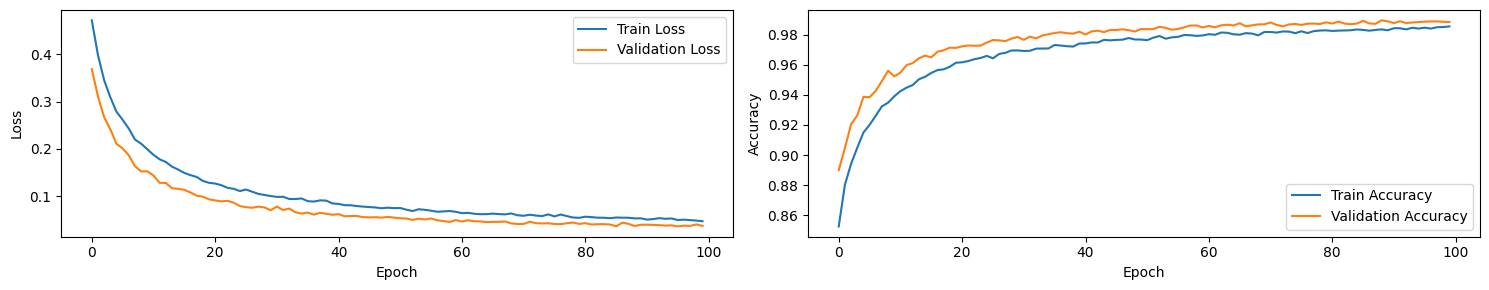

In [23]:
# Compile the model
model_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
'''sparse_categorical_crossentropy is for integer targets;
    categorical_crossentropy is for one hot encoded targets'''
# Assuming you have already defined your ImageDataGenerator and augmented the data
# augmented_data is the output of datagen.flow(x_train, y_train, batch_size=batch_size)
learning_rate = 0.003
epochs = 100
batch_size = 4000

history = model_conv.fit(
    x=train_generator,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=val_generator,
)

# Plot metrics during training
plt.figure(figsize=(15, 3))

# Train Loss vs Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history[model_conv.metrics_names[0]], label='Train Loss')
plt.plot(history.history[f'val_{model_conv.metrics_names[0]}'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Train Accuracy vs Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history[model_conv.metrics_names[1]], label='Train Accuracy')
plt.plot(history.history[f'val_{model_conv.metrics_names[1]}'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Trained with T4 GPU, Colab

In [25]:

from google.colab import drive
drive.mount('/content/drive')
model_conv.save('/content/drive/MyDrive/MLMarch/CNN_Augmented_100_model.h5')

# model_conv.save('CNN_Augmented_100_model.h5') # For saving it locally

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
# from tensorflow.keras.models import load_model
# from google.colab import drive
# drive.mount('/content/drive')
# model_conv = load_model('/content/drive/MyDrive/MLMarch/CNN_Augmented_100_model.h5')

print("\n Evaluate the new model against the test set:")
model_conv.evaluate(x=x_test, y=y_test, batch_size=batch_size)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

 Evaluate the new model against the test set:
3/3 [==============================] - 0s 17ms/step - loss: 0.0153 - accuracy: 0.9945


[0.015324227511882782, 0.9944999814033508]

Best accuracy (99.45%) obtained till now.

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

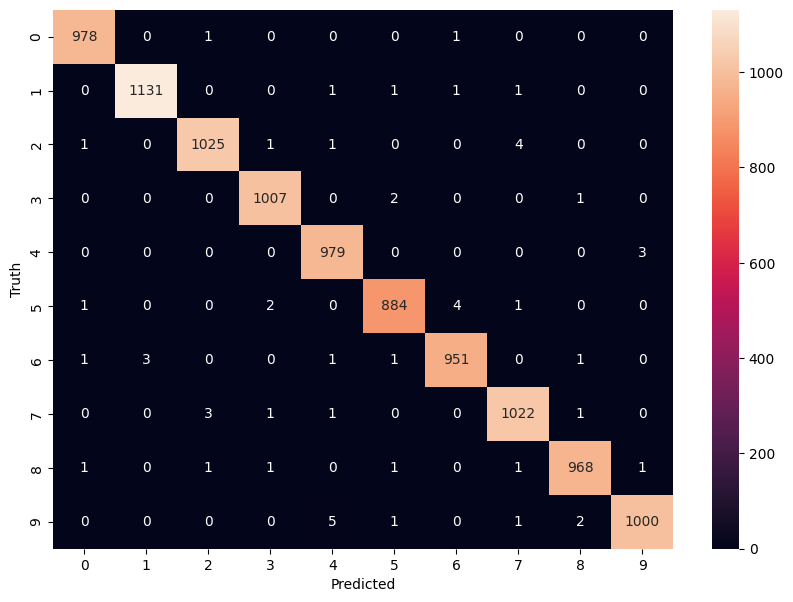

In [26]:
import seaborn as sn
y_predicted = model_conv.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, y_predicted_labels)

print("__Classification Report__ [Using Augmented data with CNN]:")
print(report)

__Classification Report__ [Using Augmented data with CNN]:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



We can see quite a few no. of 1.0 which indicates perfect precision/ recall/ f1-score.